In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import division
from __future__ import print_function
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# %tensorflow_version 1.14
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy.linalg as la
import scipy.io as sio
import math
import sys
import time
import pdb
import matplotlib.pyplot as plt
import problem, network, train
import blocksparsetoolbox as bst

from scipy.linalg import toeplitz, circulant

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
np.random.seed(1)
tf.set_random_seed(1)

In [3]:
# Creating the mmv-problem: select circular matrix case 1-8

In [4]:
case = 10
n = 60
m = n
d = 15
r = 40

T = np.zeros((n,n))
T[0,-1]=1
T[1:n,0:n-1]=np.eye(n-1)

if case==1:
  #1 Example: Random Circular Symmetric Matrix, where D^T@D has full rank
  a = np.random.normal(size=(m))
  D = circulant(a).astype('float32')
  D = 1/2*(D+D.T)
  D = 1/np.linalg.norm(D[:,0])*D
  for i in range(1,n):
    D[:,i]=T@D[:,i-1]

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==2:
  #2 Example: Symmetric Circular Matrix, based upon discrete function values, where D^T@D has low rank

  x = np.linspace(-1,1,n)
  a = 0.5-2*x**2
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==3:
  #3 Example: Symmetric Circular Matrix, based upon discrete function values, where D^T@D has low rank

  x = np.linspace(-1,1,n)
  a = (np.cos(1*np.pi*x))
  #a = 1/np.linalg.norm(a)*np.abs(a) #no problem
  a = 1/np.linalg.norm(a)*(a) #problem
  D = circulant(a).astype('float32')

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==4:
  #4 Example: Random Circular Matrix

  a = np.random.normal(size=(m))
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==5:
  #5 Example: Circular Matrix, based upon discrete function values,
  
  x = np.linspace(-1,1,n)
  a = (np.sin(1*np.pi*x))
  #a = 1/np.linalg.norm(a)*np.abs(a) #no problem
  a = 1/np.linalg.norm(a)*(a) #problem
  D = circulant(a).astype('float32')

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==6:
  #6 Example: Circular Matrix, based upon discrete function values,
  
  x = np.linspace(-1,1,n)
  a = (np.exp(1*np.pi*x))
  #a = 1/np.linalg.norm(a)*np.abs(a) #no problem
  a = 1/np.linalg.norm(a)*(a) #problem
  D = circulant(a).astype('float32')

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==7:
  #7 Example: Circular Matrix, not symmetric but low rank
  x = np.linspace(-1,1,n)
  a = np.cos(np.pi*x)
  a[30:n]=0
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D))) 
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==8:
  #8 Example: Circular Matrix, 
  x = np.linspace(-1,1,n)
  a = np.exp(np.pi*x)
  a[30:n]=a[0:30]
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D))) 
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==9:
  #9 Toeplitz Case:
  x = np.linspace(-1,1,n-30)
  a = np.random.normal(size=(n-30))
  padding = np.zeros(np.round(n), a.dtype)
  first_col = np.r_[a, padding]
  first_row = np.r_[a[0], padding]
  D = toeplitz(first_col, first_row)
  D = 1/np.linalg.norm(D[:,0])*D
  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D))) 
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m+1)))))
elif case==10:
  k = np.zeros(n)
  a = np.random.normal(r)
  s_i = np.random.permutation(n)
  s = s_i[0:r]
  k[s] = a
  k = np.real(np.fft.ifft(k))
  D = circulant(k).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D
  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D))) 
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))

rank(D^T@D)=55
rank(D@D^T)=55
rank(D)=55
coherence = 0.20428796112537384


In [5]:
SNR = np.infty # signal to noise ratio given in dB
MC = 250 # batch number
prob = problem.mmv_problem(D,B=d, MC=MC, pnz=0.1, SNR_dB=SNR) #case 5 with SNR = 30dB and pnz = 0.01 works. 
                                                                   #Be careful here, because poor coherence does not allow for great sparsity

Instructions for updating:
Use `tf.cast` instead.


Text(0.5, 1.0, 'y')

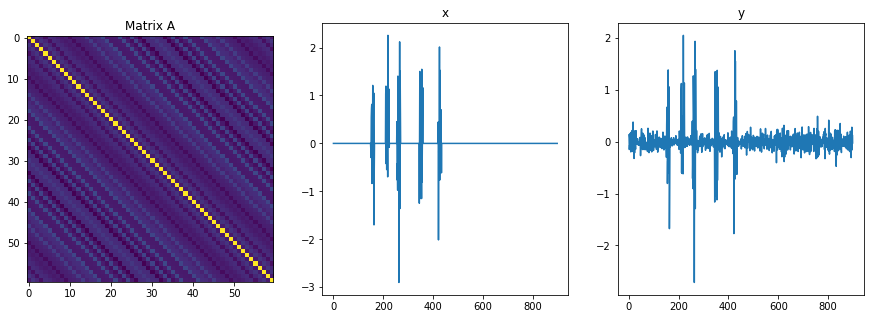

In [6]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,3)
ax[0].imshow(prob.A_s)
ax[0].set_title('Matrix A')
ax[1].plot(prob.xval[:,0])
ax[1].set_title('x')
ax[2].plot(prob.yval[:,0])
ax[2].set_title('y')


In [7]:
# creating the network and setup training:

T = 6 # number of layers/iterations

In [8]:
# computing the analytical weight matrix for ALBISTA and NA-ALBISTA

W = network.SolveViaFFT(circulant(prob.A_s[:,0])) # if A_s represents a circular convolution we can easily compute the analytical 
                                  # weight matrix by inverting the conjugate FFT of k, where A_s=circ(k)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'FFT of orthogonal kernel')

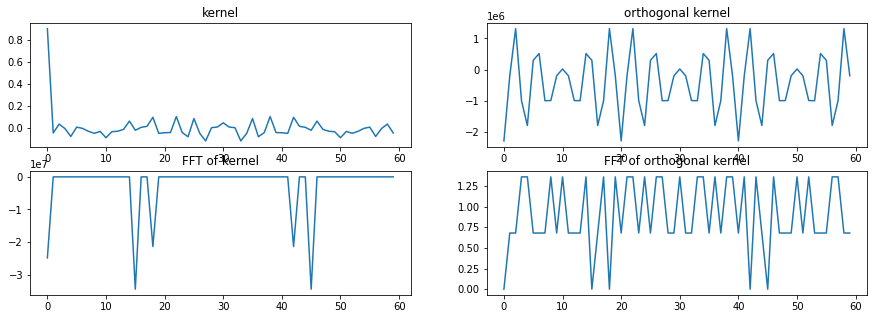

In [9]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(2,2)
ax[0,0].plot(prob.A_s[:,0])
ax[0,0].set_title('kernel')
ax[0,1].plot(W[:,0])
ax[0,1].set_title('orthogonal kernel')
ax[1,0].plot(np.fft.fft(W[:,0]))
ax[1,0].set_title('FFT of kernel')
ax[1,1].plot(np.fft.fft(prob.A_s[:,0]))
ax[1,1].set_title('FFT of orthogonal kernel')

In [10]:
print('coherence = '+str(np.max(np.abs(W.T@D-np.eye(m)))))

coherence = 2.546585164964199e-09


In [11]:
np.diag(W.T@(prob.A_s))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
layers = network.build_CircALBISTA(prob, np.kron(W[:,0:m+1],np.eye(d)), T, initial_lambda=1e-1, initial_gamma=1/(np.linalg.norm(prob.A_s)))
start = time.time()
training_stages = train.setup_training(layers,prob,trinit=1e-3)
end = time.time()
print( 'Took me {totaltime:.3f} minutes for setup training'.format(totaltime = (end-start)/60))

Took me 0.032 minutes for setup training


In [13]:
# Train!

In [14]:
sess = train.do_training(training_stages,prob,'CircALBISTA_UP_case_'+str(case)+'_T'+str(T)+'_SNRdB_'+str(SNR)+'batch'+str(MC)+'.npz')

norms xval:150.3262801 yval:150.1079248
CircALBISTA T=1 extending lam_0:0,gamma_0:0
i=0      nmse=-1.061417 dB (best=-1.061417)
i=1000   nmse=-5.591644 dB (best=-6.306789)
i=2000   nmse=-5.542780 dB (best=-6.306789)
i=3000   nmse=-5.297378 dB (best=-6.306789)
i=4000   nmse=-5.773512 dB (best=-6.306789)
i=5000   nmse=-5.478356 dB (best=-6.306789)
i=6000   nmse=-5.317879 dB (best=-6.306789)
Took me 3.466 minutes, or 34.7 ms per iteration
CircALBISTA T=2 extending lam_1:0,gamma_1:0
i=0      nmse=-7.405574 dB (best=-7.405574)
i=1000   nmse=-10.850234 dB (best=-11.548003)
i=2000   nmse=-11.085302 dB (best=-11.635660)
i=3000   nmse=-10.933011 dB (best=-11.768149)
i=4000   nmse=-10.942971 dB (best=-11.768149)
i=5000   nmse=-11.369138 dB (best=-11.768149)
i=6000   nmse=-11.382247 dB (best=-11.768149)
i=7000   nmse=-10.893679 dB (best=-11.768149)
i=8000   nmse=-10.649115 dB (best=-11.768149)
Took me 6.604 minutes, or 49.5 ms per iteration
CircALBISTA T=3 extending lam_2:0,gamma_2:0
i=0      nms

In [15]:
# Evaluating

/content/blocksparsetoolbox.py:47: RuntimeWarning: invalid value encountered in double_scalars
  return la.norm((xhat-x), ord='fro')**2/normx


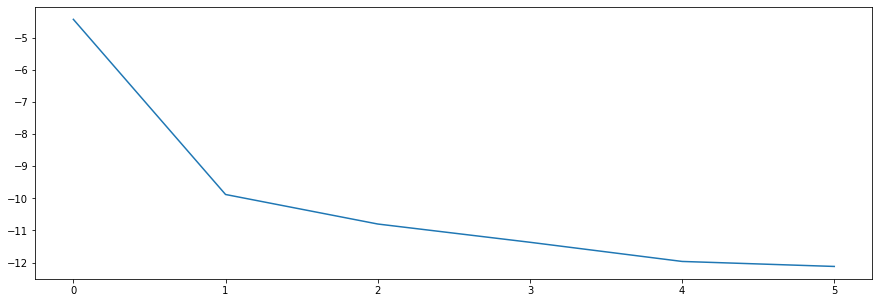

In [16]:
y,x = prob(sess)
MC = x.shape[-1]
t=0
l2norm=np.zeros(((T),MC))
nmse_dbLISTA=np.zeros(((T),MC))
for name, xhat_, var_list in layers:
    if not name=='Linear':
        xhat = sess.run(xhat_, feed_dict={prob.y_: y, prob.x_: x})
        for i in range(0, x.shape[1]):
            nmse_dbLISTA[t,i]=bst.nmse(xhat[:,i, np.newaxis], x[:,i, np.newaxis])
            l2norm[t, i] = bst.l21norm(xhat[:, i]- x[:, i], prob.L, prob.B)
        t+=1

nmse_dbLISTAMean = 10*np.log10(np.mean(np.ma.masked_invalid(nmse_dbLISTA), axis=1))
l2normLISTAMean = np.mean(np.ma.masked_invalid(l2norm), axis=1)
l2normmax = np.max(l2norm, axis=1)

lam = np.zeros(T)
gam = np.zeros(T)
k = 1
for name, xhat_, var_list in layers:
    if not name == 'Linear':
        lam[k-1], gam[k-1] = sess.run([layers[k-1][2][0], layers[k-1][2][1]])
        k = k+1

plt.plot(nmse_dbLISTAMean)

In [17]:
nmse_dbLISTAMean

masked_array(data=[-4.419332826944825, -9.87924162795068,
                   -10.799721257500481, -11.368774458508426,
                   -11.966591499575728, -12.122634617758175],
             mask=[False, False, False, False, False, False],
       fill_value=1e+20)

In [17]:
plt.plot(lam)
plt.plot(gam)
plt.legend(['lambda', 'gamma'])

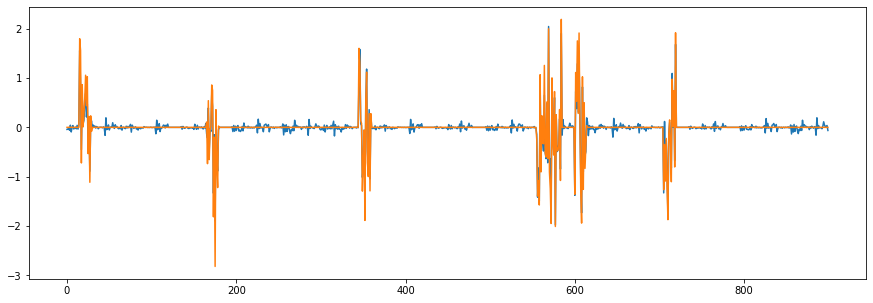

In [21]:
plt.plot(xhat[:,10])
plt.plot(x[:,10])